#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**
eight-income-distributions  dataset

version 1.0 2021-05-05

### Import libraries and set folders

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

from plotnine import *
from plotnine.scales import scale_x_continuous, scale_y_continuous
from plotnine.labels import labs
from plotnine.themes import theme_bw
from plotnine.positions import position_dodge
from mizani.formatters import percent_format
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")

In [9]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-vienna/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-vienna-explore/"
output = dirname + "da_case_studies/ch03-hotels-vienna-explore/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

ModuleNotFoundError: No module named 'py_helper_functions'

In [4]:
# load vienna
vienna = pd.read_csv("/workspaces/codespaces-jupyter/data/hotels-vienna.csv")
#vienna = pd.read_csv("https://osf.io/y6jvb/download")

In [ ]:
vienna.columns

Index(['country', 'city_actual', 'rating_count', 'center1label',
       'center2label', 'neighbourhood', 'price', 'city', 'stars', 'ratingta',
       'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter',
       'accommodation_type', 'nnights', 'rating'],
      dtype='object')

## Figures 1a and 1b

apply filters: Hotels

In [ ]:
vienna["accommodation_type"].value_counts()

accommodation_type
Hotel                  264
Apartment              124
Pension                 16
Guest House              8
Hostel                   6
Bed and breakfast        4
Apart-hotel              4
Vacation home Condo      2
Name: count, dtype: int64

In [6]:
vienna_cut = vienna.loc[vienna["accommodation_type"] == "Hotel"]

In [ ]:
vienna_cut.columns

Index(['country', 'city_actual', 'rating_count', 'center1label',
       'center2label', 'neighbourhood', 'price', 'city', 'stars', 'ratingta',
       'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter',
       'accommodation_type', 'nnights', 'rating'],
      dtype='object')

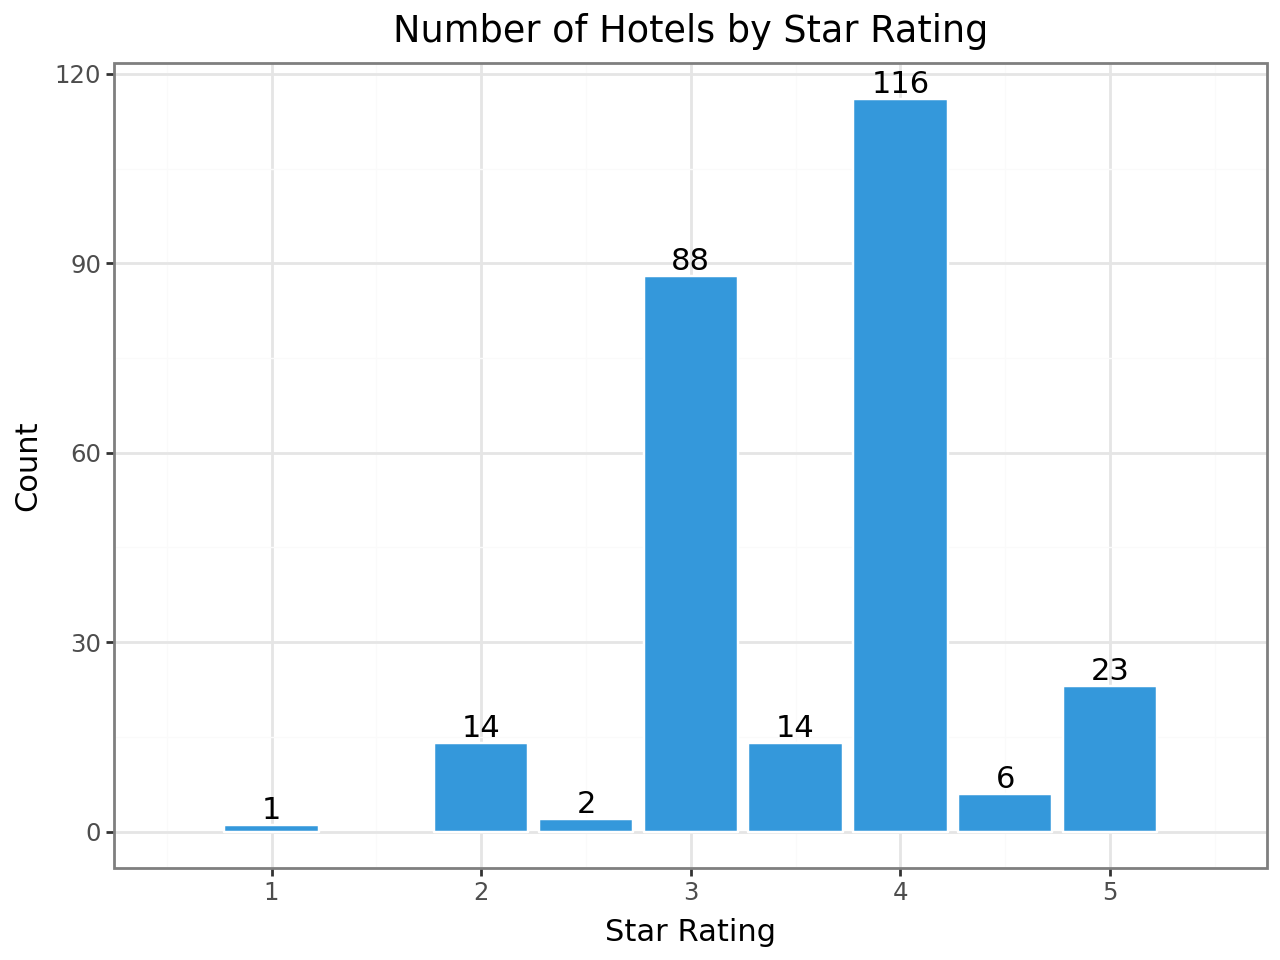

In [ ]:
import pandas as pd
from plotnine import *
(
    ggplot(vienna_cut, aes(x="stars"))
    + geom_bar(fill="#3498db", color="white")
    + geom_text(
        aes(label="..count.."),
        stat="count",
        va="bottom",  # vertical alignment
        format_string='{:.0f}'  # integer formatting
    )
    + labs(title="Number of Hotels by Star Rating", x="Star Rating", y="Count")
    + scale_x_continuous(breaks=np.arange(1, 6, 1), limits=[0.5, 5.5])
    + theme_bw()
)

In [ ]:
# Check the data types of all columns in the DataFrame
print(vienna_cut.dtypes)

country                object
city_actual            object
rating_count          float64
center1label           object
center2label           object
neighbourhood          object
price                   int64
city                   object
stars                 float64
ratingta              float64
ratingta_count        float64
scarce_room             int64
hotel_id                int64
offer                   int64
offer_cat              object
year                    int64
month                   int64
weekend                 int64
holiday                 int64
distance              float64
distance_alter        float64
accommodation_type     object
nnights                 int64
rating                float64
dtype: object


In [ ]:
# Show unique values in the 'stars' column
print(vienna_cut['stars'].unique())

[4.  3.  2.  2.5 3.5 5.  4.5 1. ]


In [ ]:
unique_stars = sorted(vienna_cut['stars'].dropna().unique())
unique_stars

[np.float64(1.0),
 np.float64(2.0),
 np.float64(2.5),
 np.float64(3.0),
 np.float64(3.5),
 np.float64(4.0),
 np.float64(4.5),
 np.float64(5.0)]

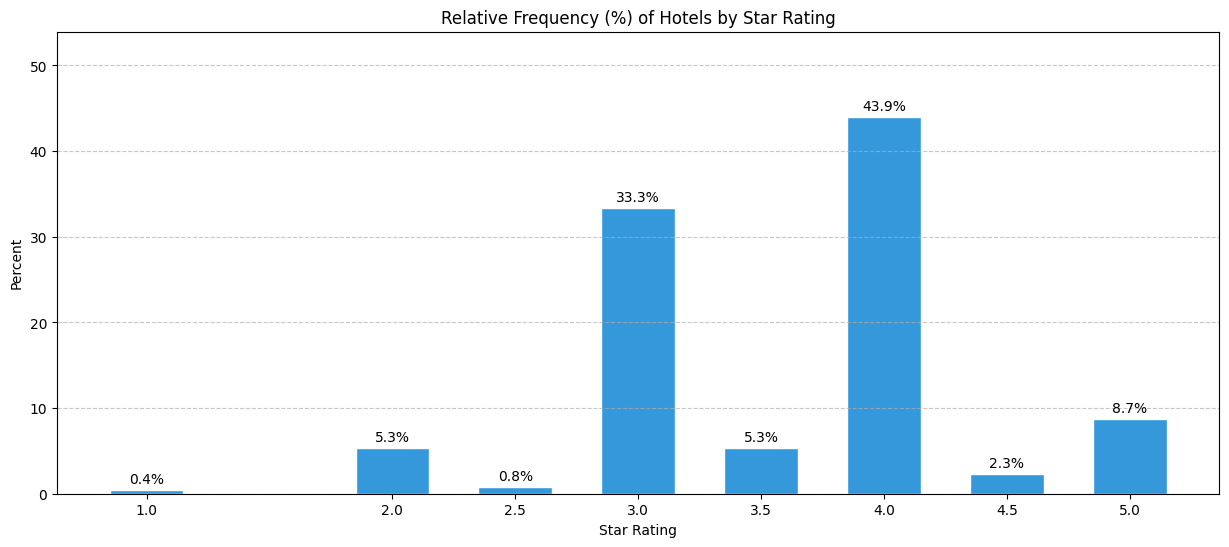

In [ ]:
# Calculate relative frequency
rel_freq = vienna_cut['stars'].value_counts(normalize=True).sort_index() * 100
unique_stars = sorted(vienna_cut['stars'].dropna().unique())

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(unique_stars, rel_freq.values, color="#3498db", edgecolor="white", width=0.3)


# Add labels above bars
ax.bar_label(bars, labels=[f"{val:.1f}%" for val in rel_freq.values], padding=3)

# Formatting
ax.set_xlabel("Star Rating")
ax.set_ylabel("Percent")
ax.set_title("Relative Frequency (%) of Hotels by Star Rating")
ax.set_xticks(unique_stars)
ax.set_ylim(0, rel_freq.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



In [ ]:
freq = vienna_cut['stars'].value_counts()
freq


stars
4.0    116
3.0     88
5.0     23
2.0     14
3.5     14
4.5      6
2.5      2
1.0      1
Name: count, dtype: int64

In [ ]:
unique_stars = freq.index
unique_stars

Index([4.0, 3.0, 5.0, 2.0, 3.5, 4.5, 2.5, 1.0], dtype='float64', name='stars')

In [ ]:
# Calculate sums for all star ratings
star_sums = vienna_cut.groupby('stars')['stars'].count()

print(star_sums)

stars
1.0      1
2.0     14
2.5      2
3.0     88
3.5     14
4.0    116
4.5      6
5.0     23
Name: stars, dtype: int64


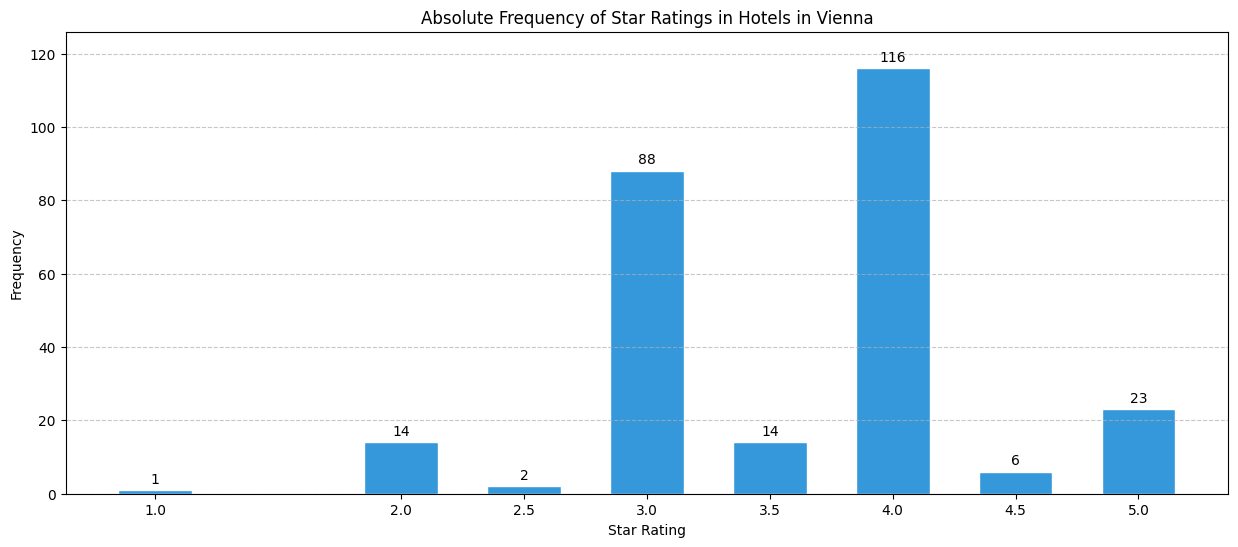

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

freq = vienna_cut['stars'].value_counts()
unique_stars = freq.index

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(unique_stars, freq, color="#3498db", edgecolor="white", width=0.3)


# Add labels above bars
ax.bar_label(bars, labels=[f"{val:.0f}" for val in freq], padding=3)

# Formatting
ax.set_xlabel("Star Rating")
ax.set_ylabel("Frequency")
ax.set_title("Absolute Frequency of Star Ratings in Hotels in Vienna")
ax.set_xticks(unique_stars)
ax.set_ylim(0, freq.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# load vienna
vienna = pd.read_csv("/workspaces/codespaces-jupyter/data/hotels-vienna.csv")
vienna_cut.shape

(264, 24)

In [ ]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
     & (vienna["stars"] >= 3)
     & (vienna["stars"] <= 4)]
vienna_cut.shape[0]

218

In [ ]:
vienna_cut.columns

Index(['country', 'city_actual', 'rating_count', 'center1label',
       'center2label', 'neighbourhood', 'price', 'city', 'stars', 'ratingta',
       'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter',
       'accommodation_type', 'nnights', 'rating'],
      dtype='object')

In [ ]:
max_price=vienna_cut['price'].max()

In [ ]:
max_price=vienna_cut['price'].max()
max_price

np.int64(1012)

In [ ]:
max_price_index = vienna_cut['price'].idxmax()

vienna_cut = vienna_cut.drop(max_price_index)

vienna_cut

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9
6,Austria,Vienna,57.0,City centre,Donauturm,Alsergrund,103,Vienna,4.0,3.5,...,0% no offer,2017,11,0,0,0.9,2.4,Hotel,1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Austria,Vienna,77.0,City centre,Donauturm,Wieden,100,Vienna,3.0,4.0,...,1-15% offer,2017,11,0,0,1.2,3.7,Hotel,1,4.0
421,Austria,Vienna,572.0,City centre,Donauturm,Wieden,95,Vienna,4.0,4.0,...,1-15% offer,2017,11,0,0,1.5,3.9,Hotel,1,4.1
422,Austria,Vienna,53.0,City centre,Donauturm,Wieden,73,Vienna,3.0,3.0,...,1-15% offer,2017,11,0,0,1.5,4.0,Hotel,1,3.4
425,Austria,Vienna,112.0,City centre,Donauturm,Wieden,100,Vienna,4.0,4.5,...,0% no offer,2017,11,0,0,1.0,3.7,Hotel,1,4.4


In [ ]:
max_price=vienna_cut['price'].max()
max_price

np.int64(383)

### Distributions

Apply filters:  3-4 stars, less than 8miles from center, without 1000 euro extreme value


#### Figure 3.2 a)

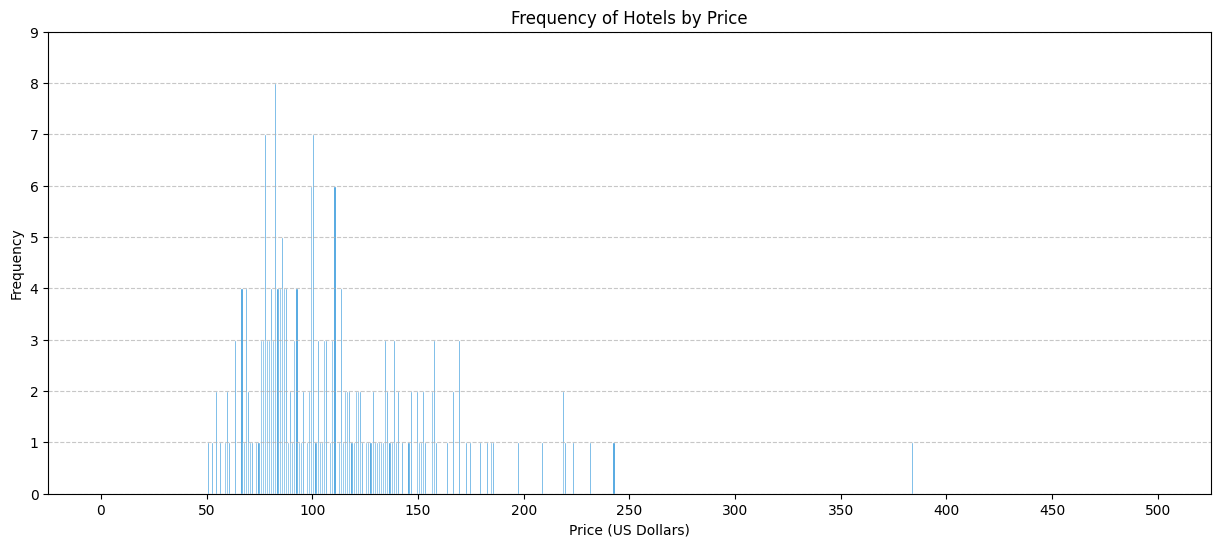

In [ ]:
x_ticks = np.arange(0, 501, 50)

# Calculate frequency for the price column
freq = vienna_cut['price'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(vienna_cut['price'], bins=np.arange(0, 501), color="#3498db", edgecolor="white")

# Add labels above bars
#ax.bar_label(bars, labels=[f"{val:.0f}" for val in freq.values], padding=3)

# Formatting
ax.set_xlabel("Price (US Dollars)")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Hotels by Price")
ax.set_xticks(x_ticks)  # Set x-axis ticks
ax.set_ylim(0, freq.max() +1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Figure 3.2 b)

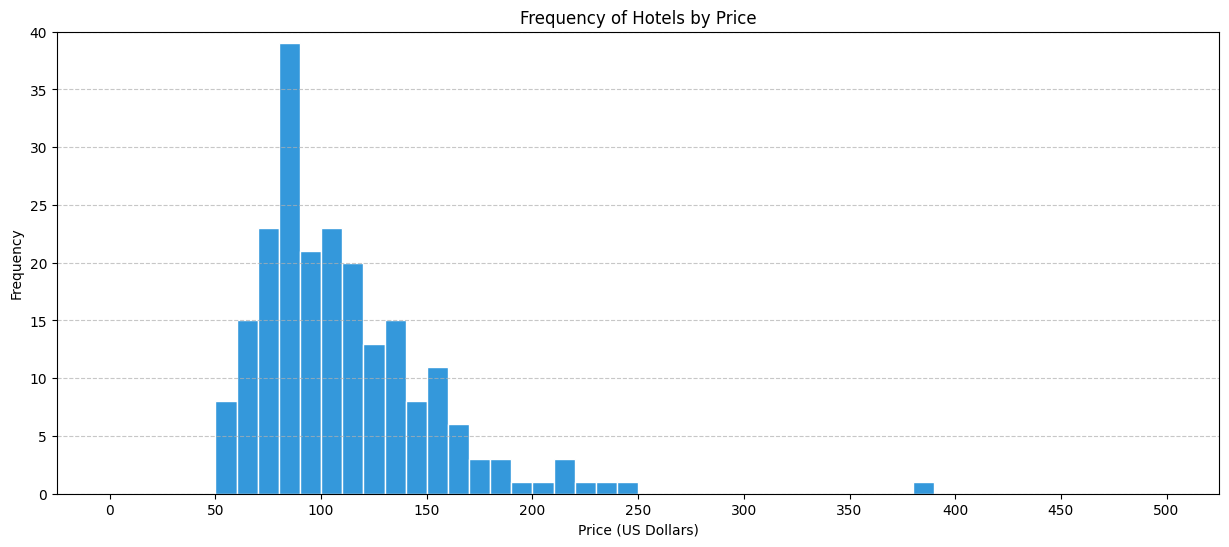

In [ ]:
x_ticks = np.arange(0, 501, 50)

# Plot histogram with 10-dollar wide bins
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(vienna_cut['price'], bins=np.arange(0, 501, 10), color="#3498db", edgecolor="white")

# Formatting
ax.set_xlabel("Price (US Dollars)")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Hotels by Price")
ax.set_xticks(x_ticks)  # Set x-axis ticks
ax.set_ylim(0, 40)  # Set y-axis limit to 9
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Figure 3 a,b

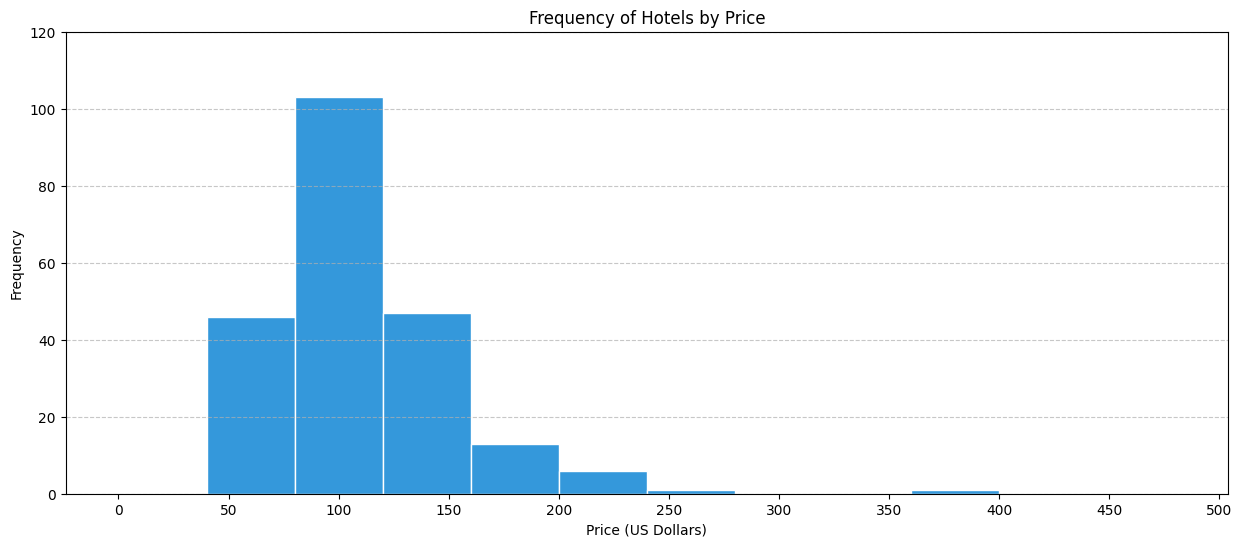

In [ ]:
x_ticks = np.arange(0, 501, 50)

# Plot histogram with 10-dollar wide bins
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(vienna_cut['price'], bins=np.arange(0, 501, 40), color="#3498db", edgecolor="white")

# Formatting
ax.set_xlabel("Price (US Dollars)")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Hotels by Price")
ax.set_xticks(x_ticks)  # Set x-axis ticks
ax.set_ylim(0, 120)  # Set y-axis limit to 9
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

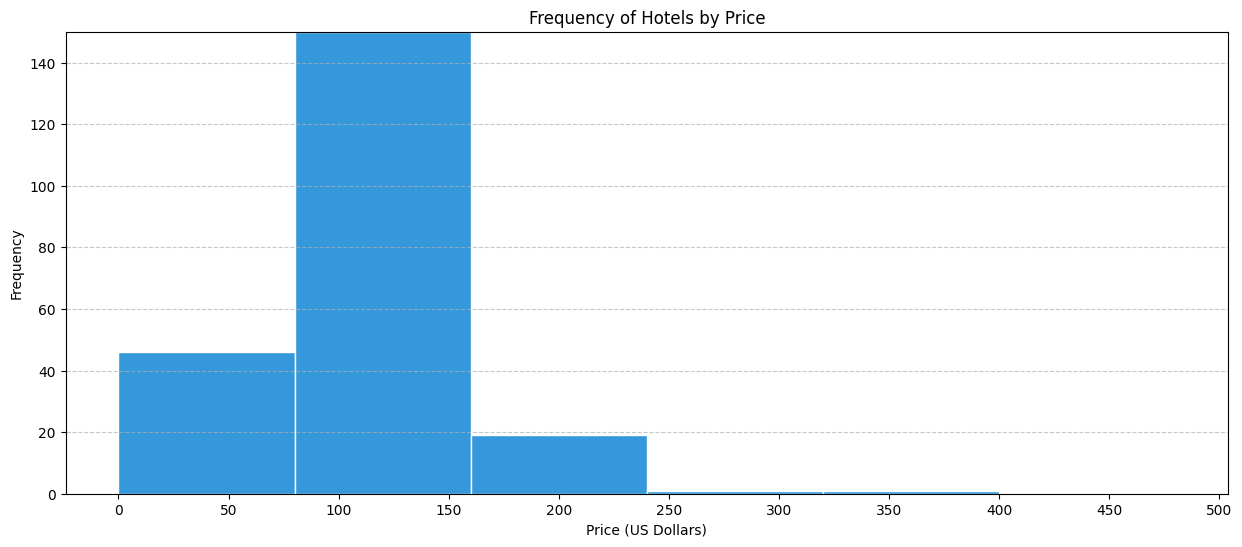

In [ ]:
x_ticks = np.arange(0, 501, 50)

# Plot histogram with 10-dollar wide bins
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(vienna_cut['price'], bins=np.arange(0, 501, 80), color="#3498db", edgecolor="white")

# Formatting
ax.set_xlabel("Price (US Dollars)")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Hotels by Price")
ax.set_xticks(x_ticks)  # Set x-axis ticks
ax.set_ylim(0, 150)  # Set y-axis limit to 9
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Extreme values

Apply filters: 3-4 stars, less than 8miles from center, without 1000 euro extreme value


In [ ]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
    & (vienna["price"] <= 1000)
]

In [ ]:
vienna_cut.columns

Index(['country', 'city_actual', 'rating_count', 'center1label',
       'center2label', 'neighbourhood', 'price', 'city', 'stars', 'ratingta',
       'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter',
       'accommodation_type', 'nnights', 'rating'],
      dtype='object')

In [ ]:
vienna_cut.shape[0]

218

In [ ]:

vienna_cut.shape[0]


218

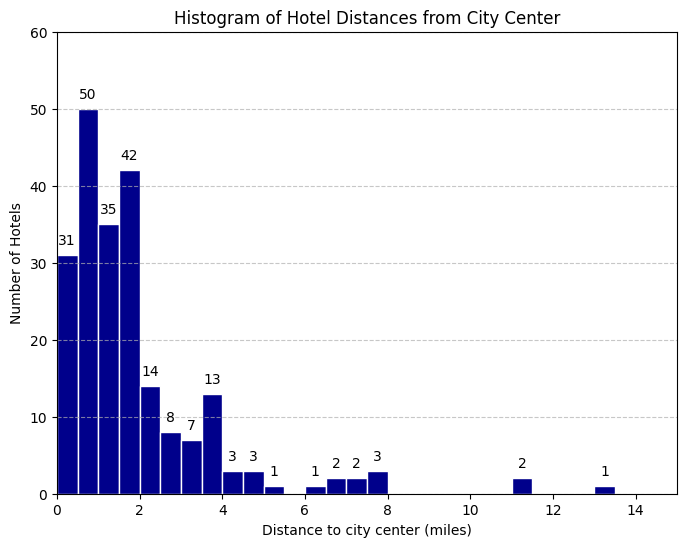

In [ ]:
# Plot histogram with 0.5-mile wide bins
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(
    vienna_cut['distance'].dropna(),  # Remove NaNs
    bins=np.arange(0, 15.5, 0.5),     # Bins from 0 to 15, width = 0.5
    color="darkblue",
    edgecolor="white"
)

# Add value labels above bars (skip zeros)
for patch, value in zip(patches, n):
    if value > 0:
        ax.text(patch.get_x() + patch.get_width() / 2,
                patch.get_height() + 1,
                f"{int(value)}",
                ha='center', va='bottom', fontsize=10)

# Formatting
ax.set_xlabel("Distance to city center (miles)")
ax.set_ylabel("Number of Hotels")
ax.set_title("Histogram of Hotel Distances from City Center")
ax.set_xticks(np.arange(0, 15, 2))
ax.set_xlim(0, 15)
ax.set_ylim(0, n.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
    & (vienna["price"] <= 1000)
    & (vienna["distance"] <= 8)
    & (vienna["distance"].notna())
]

In [ ]:
# Check all unique city values
vienna_cut['city_actual'].unique()

array(['Vienna', 'Schwechat', 'Voesendorf'], dtype=object)

In [ ]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
    & (vienna["price"] <= 1000)
    & (vienna["distance"] <= 8)
    & (vienna["distance"].notna()) 
    & (vienna["city_actual"].isin(["Vienna"]))
]

In [ ]:
vienna_new_cut = vienna.loc[
    (vienna["city_actual"].isin(["Schwechat"]))
]


In [ ]:
vienna_new_cut['city_actual'].unique()
vienna_new_cut.shape[0]

7

In [ ]:
vienna_cut['city_actual'].unique()
vienna_cut.shape[0]

207

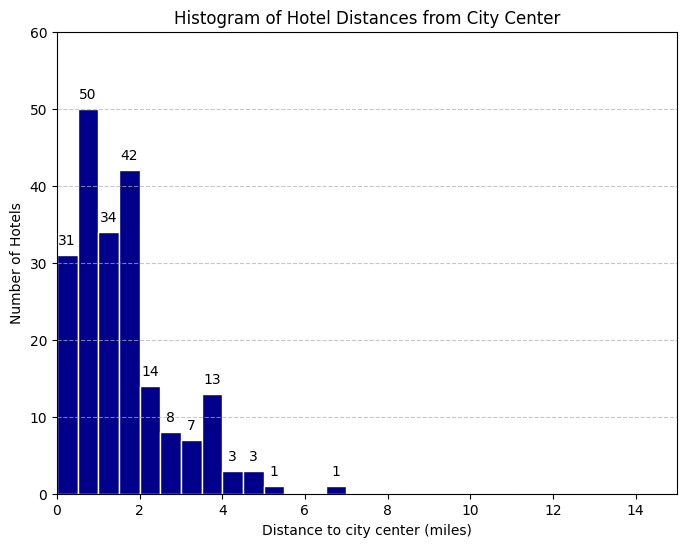

In [ ]:
# Plot histogram with 0.5-mile wide bins
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(
    vienna_cut['distance'].dropna(),  # Remove NaNs
    bins=np.arange(0, 15.5, 0.5),     # Bins from 0 to 15, width = 0.5
    color="darkblue",
    edgecolor="white"
)

# Add value labels above bars (skip zeros)
for patch, value in zip(patches, n):
    if value > 0:
        ax.text(patch.get_x() + patch.get_width() / 2,
                patch.get_height() + 1,
                f"{int(value)}",
                ha='center', va='bottom', fontsize=10)

# Formatting
ax.set_xlabel("Distance to city center (miles)")
ax.set_ylabel("Number of Hotels")
ax.set_title("Histogram of Hotel Distances from City Center")
ax.set_xticks(np.arange(0, 15, 2))
ax.set_xlim(0, 15)
ax.set_ylim(0, n.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


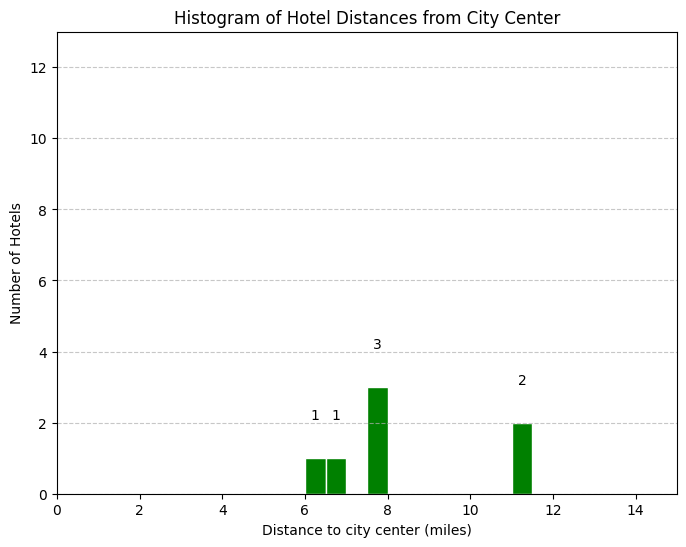

In [ ]:
# Plot histogram with 0.5-mile wide bins
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(
    vienna_new_cut['distance'].dropna(),  # Remove NaNs
    bins=np.arange(0, 15.5, 0.5),     # Bins from 0 to 15, width = 0.5
    color="green",
    edgecolor="white"
)

# Add value labels above bars (skip zeros)
for patch, value in zip(patches, n):
    if value > 0:
        ax.text(patch.get_x() + patch.get_width() / 2,
                patch.get_height() + 1,
                f"{int(value)}",
                ha='center', va='bottom', fontsize=10)

# Formatting
ax.set_xlabel("Distance to city center (miles)")
ax.set_ylabel("Number of Hotels")
ax.set_title("Histogram of Hotel Distances from City Center")
ax.set_xticks(np.arange(0, 15, 2))
ax.set_xlim(0, 15)
ax.set_ylim(0, n.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


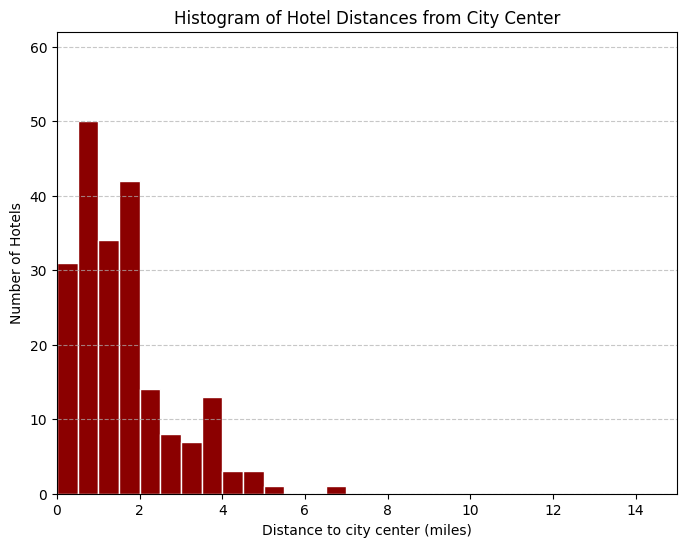

In [ ]:
# Drop NaNs and plot histogram with 0.5 mile bins
ax = vienna_cut['distance'].dropna().plot(
    kind='hist',
    bins=np.arange(0, 15.5, 0.5),
    color='darkred',
    edgecolor='white',
    figsize=(8, 6)
)

# Add labels and formatting
ax.set_xlabel("Distance to city center (miles)")
ax.set_ylabel("Number of Hotels")
ax.set_title("Histogram of Hotel Distances from City Center")
ax.set_xticks(np.arange(0, 15, 2))
ax.set_xlim(0, 15)
ax.set_ylim(0, vienna_cut['distance'].value_counts(bins=np.arange(0, 15.5, 0.5)).max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


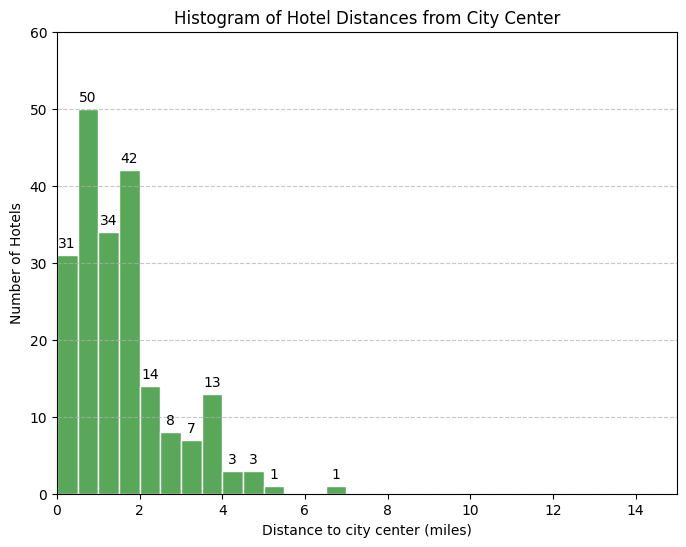

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop NaNs from distance
distances = vienna_cut['distance'].dropna()

# Plot
plt.figure(figsize=(8, 6))
ax = sns.histplot(
    data=distances,
    bins=np.arange(0, 15.5, 0.5),  # bin edges
    color='forestgreen',
    edgecolor='white'
)

# Add count labels manually
counts, bin_edges = np.histogram(distances, bins=np.arange(0, 15.5, 0.5))
for x, y in zip(bin_edges[:-1], counts):
    if y > 0:
        plt.text(x + 0.25, y + 1, str(y), ha='center', fontsize=10)

# Formatting
plt.xlabel("Distance to city center (miles)")
plt.ylabel("Number of Hotels")
plt.title("Histogram of Hotel Distances from City Center")
plt.xticks(np.arange(0, 15, 2))
plt.xlim(0, 15)
plt.ylim(0, counts.max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


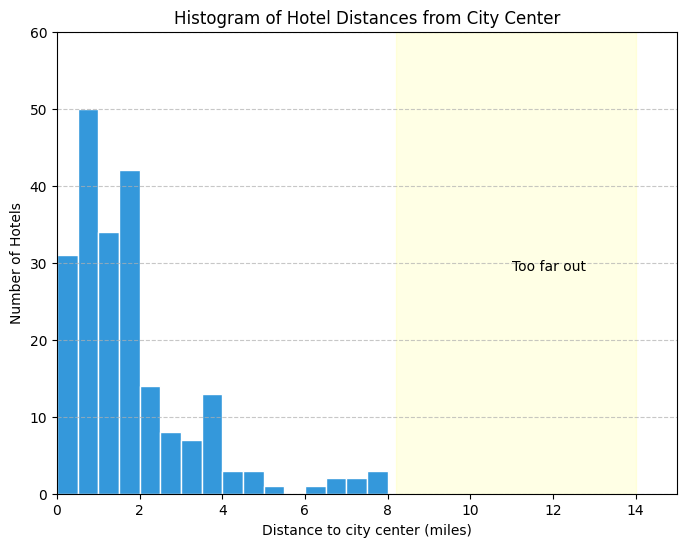

In [ ]:
import matplotlib.pyplot as plt

# Example: histogram (you already have this)
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(
    vienna_cut['distance'].dropna(),
    bins=np.arange(0, 15.5, 0.5),
    color="#3498db",
    edgecolor="white"
)

# 🔹 Add semi-transparent yellow rectangle
ax.axvspan(8.2, 14, ymin=0, ymax=1, alpha=0.1, color='yellow')

# 🔹 Add annotation text
ax.text(11, 29, "Too far out", fontsize=10)

# Formatting (optional)
ax.set_xlim(0, 15)
ax.set_ylim(0, 60)
ax.set_xticks(np.arange(0, 15, 2))
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xlabel("Distance to city center (miles)")
ax.set_ylabel("Number of Hotels")
ax.set_title("Histogram of Hotel Distances from City Center")

plt.show()


In [ ]:
vienna_cut.shape[0] 

214

####  Figure 3.4

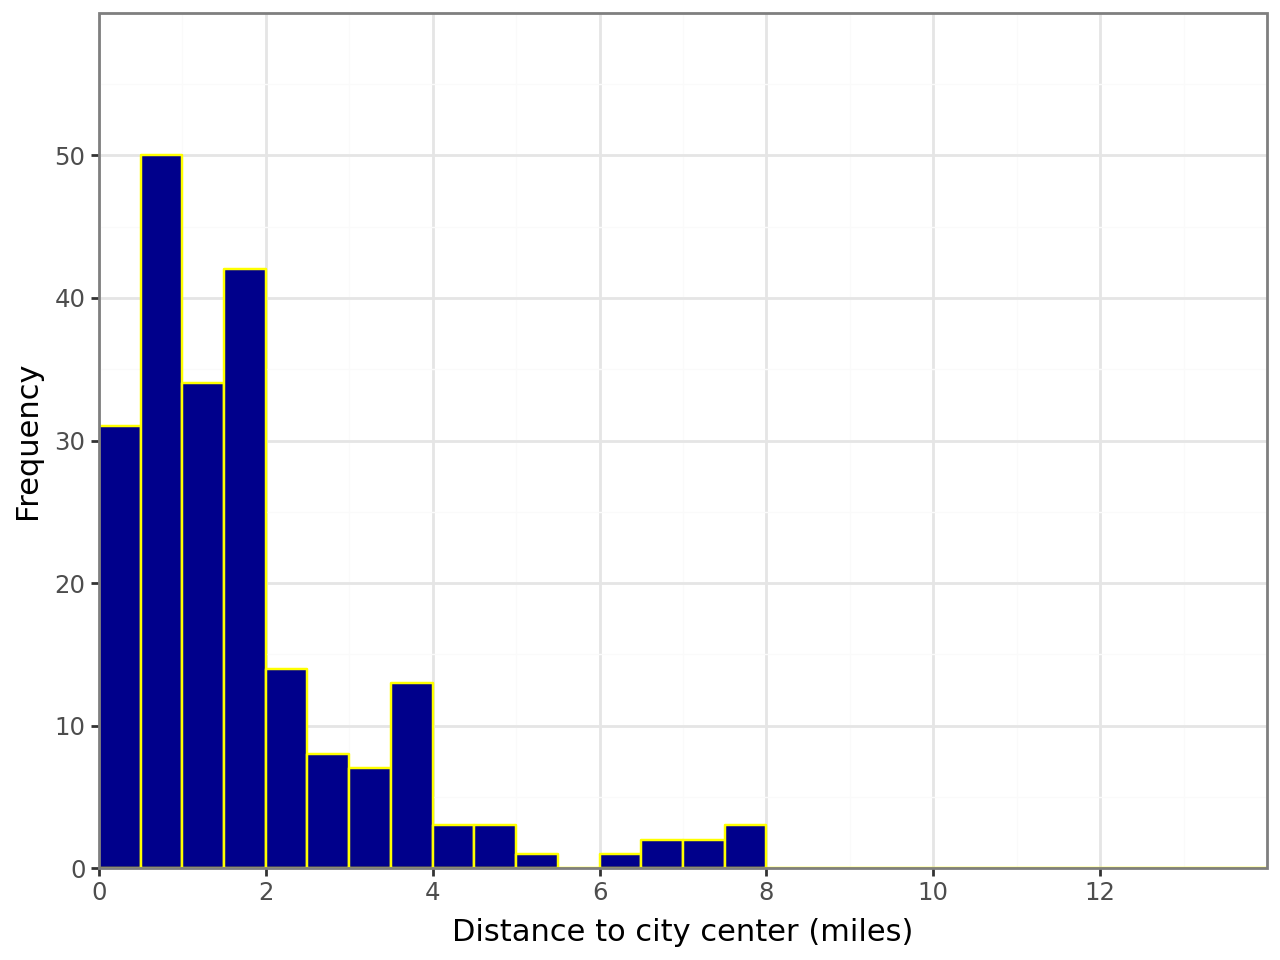

In [ ]:
(
    ggplot(vienna_cut, aes(x="distance"))
    + geom_histogram(
        aes(y=after_stat("count")),
        binwidth=0.5,
        fill="darkblue",
        color="yellow",
        boundary=0,
        closed="left",
    )
    + labs(x="Distance to city center (miles)", y="Frequency")
    + scale_x_continuous(expand=[0.0, 0.0], limits=[0, 14], breaks=np.arange(0, 14, 2))
    + scale_y_continuous(expand=[0.0, 0.0], limits=[0, 60], breaks=np.arange(0, 60, 10))
    + theme_bw()
)


with annotation

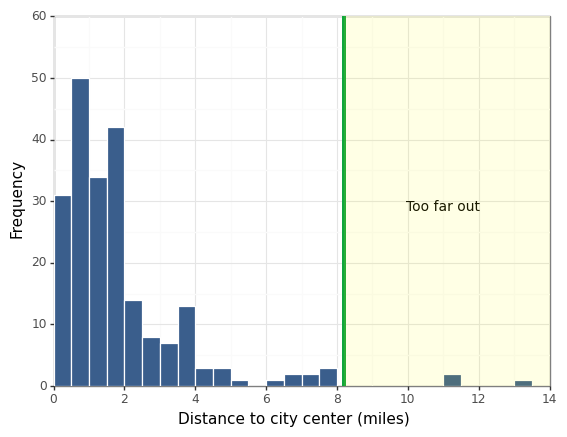

<ggplot: (367767074)>

In [ ]:
(
    ggplot(vienna_cut, aes(x="distance"))
    + geom_histogram(
        y="stat(count)/sum(stat(count))",
        binwidth=0.5,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Distance to city center (miles)", y="Frequency")
    + scale_x_continuous(expand=[0.0, 0.0], limits=[0, 14], breaks=seq(0, 14, 2))
    + scale_y_continuous(expand=[0.0, 0.0], limits=[0, 60], breaks=seq(0, 60, 10))
    + geom_segment(aes(x=8.2, y=0, xend=8.2, yend=60), color=color[1], size=1)
    + annotate("text", x=11, y=29, label="Too far out", size=10)
    + annotate(
        geom="rect", xmin=8.2, xmax=14, ymin=0, ymax=60, alpha=0.1, fill="yellow"
    )
    + theme_bw()
)


 look at actual city

In [ ]:
vienna_cut['city_actual'].value_counts()

Vienna        207
Schwechat       7
Voesendorf      2
Fischamend      1
Name: city_actual, dtype: int64

 ### Figure price with extreme
 Apply filters:  3-4 stars, less than 8miles from center, without 1000 euro extreme value

In [ ]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
]

In [ ]:
(
    ggplot(vienna_cut, aes(x="price"))
    + geom_histogram(
        y="stat(count)/sum(stat(count))",
        binwidth=20,
        fill="#3498db",
        color="white",
        boundary=0,
        closed="right",
    )
    + labs(x="Price (US dollars)", y="Frequency")
    + scale_x_continuous(
        expand=[0.00, 0.00], limits=[0, 1000], breaks=np.arange(0, 1000, 100)
    )
    + expand_limits(x=0.00, y=0.00)
    + theme_bw()
)


NameError: name 'count' is not defined

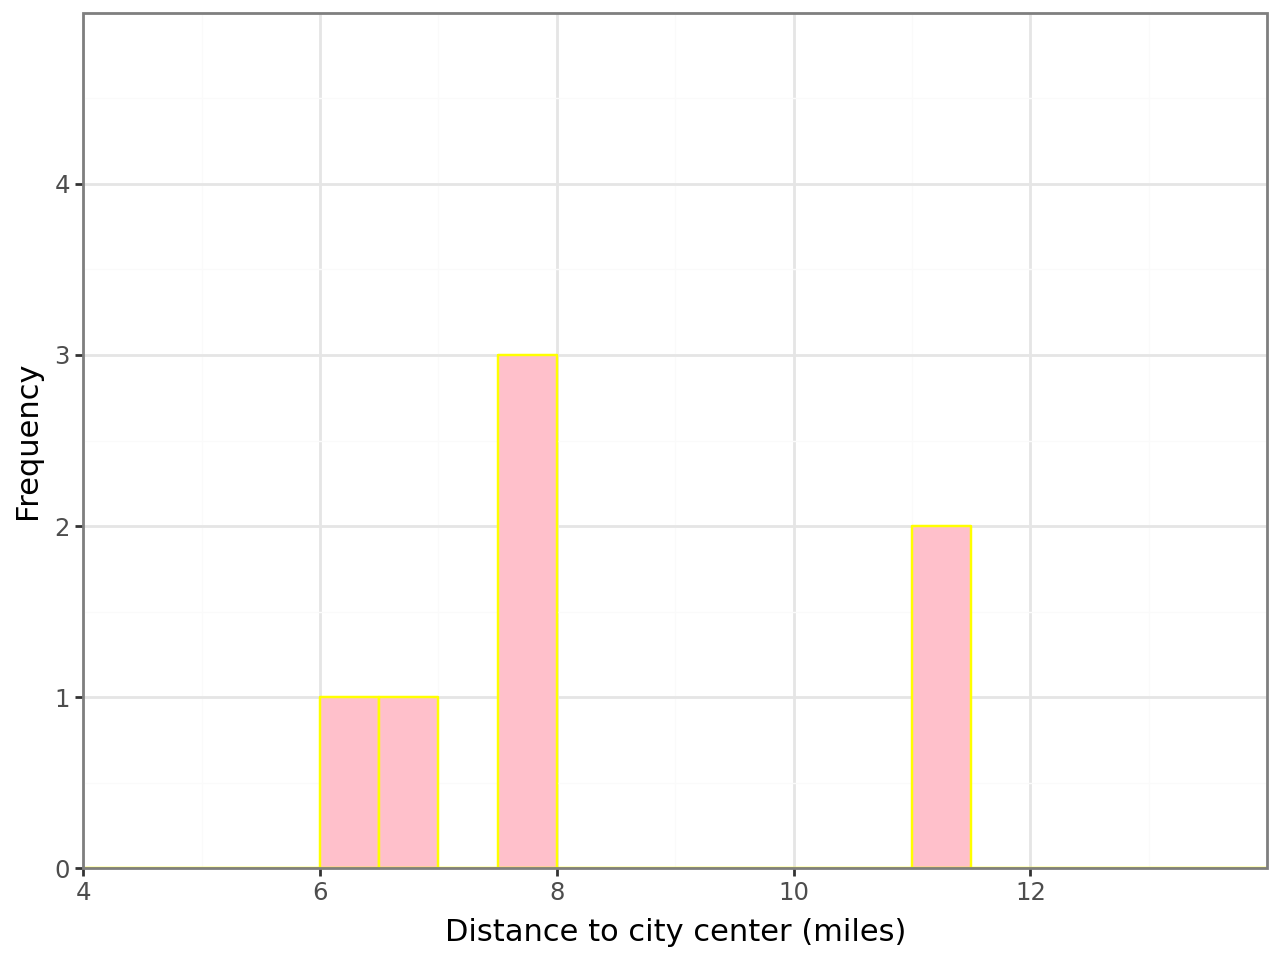

In [ ]:
(
    ggplot(vienna_new_cut, aes(x="distance"))
    + geom_histogram(
        aes(y=after_stat("count")),
        binwidth=0.5,
        fill="pink",
        color="yellow",
        boundary=0,
        closed="left",
    )
    + labs(x="Distance to city center (miles)", y="Frequency")
    + scale_x_continuous(expand=[0.0, 0.0], limits=[4, 14], breaks=np.arange(0, 14, 2))
    + scale_y_continuous(expand=[0.0, 0.0], limits=[0, 5], breaks=np.arange(0, 5, 1))
    + theme_bw()
)


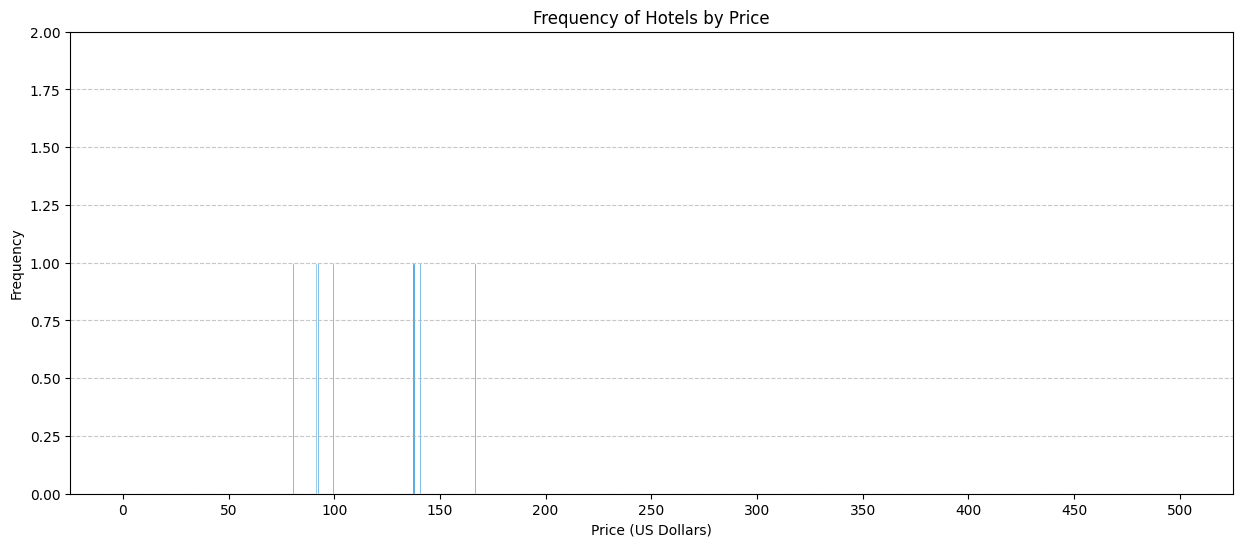

In [ ]:
x_ticks = np.arange(0, 501, 50)

# Calculate frequency for the price column
freq = vienna_new_cut['price'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(vienna_new_cut['price'], bins=np.arange(0, 501), color="#3498db", edgecolor="white")

# Add labels above bars
#ax.bar_label(bars, labels=[f"{val:.0f}" for val in freq.values], padding=3)

# Formatting
ax.set_xlabel("Price (US Dollars)")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Hotels by Price")
ax.set_xticks(x_ticks)  # Set x-axis ticks
ax.set_ylim(0, freq.max() +1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

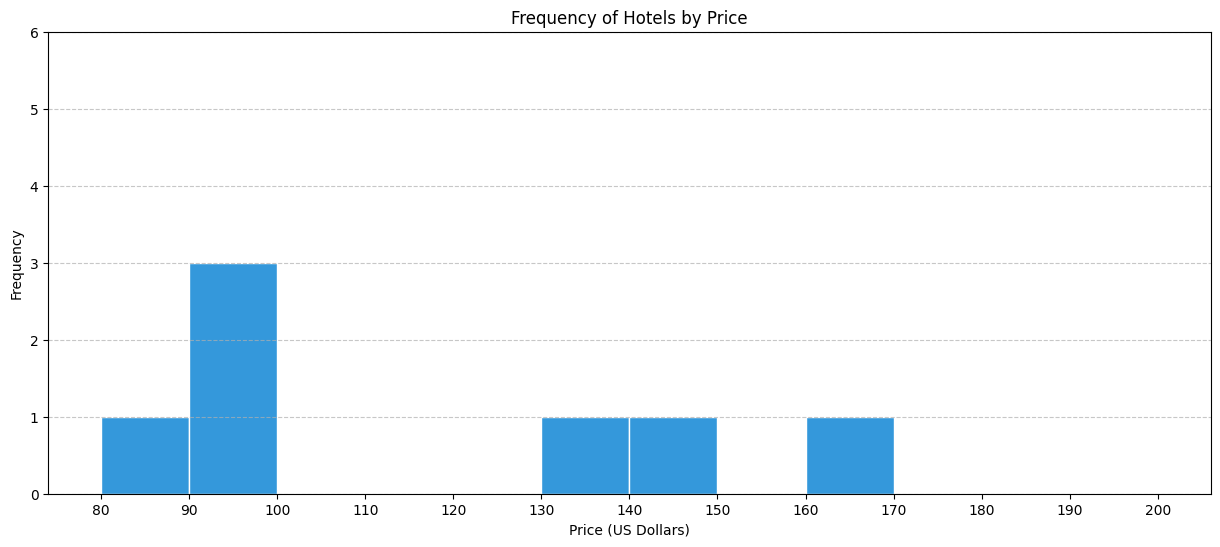

In [ ]:
x_ticks = np.arange(vienna_new_cut['price'].min(), 201, 10)

# Plot histogram with 10-dollar wide bins
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(vienna_new_cut['price'], bins=np.arange(vienna_new_cut['price'].min(), 201, 10), color="#3498db", edgecolor="white")

# Formatting
ax.set_xlabel("Price (US Dollars)")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Hotels by Price")
ax.set_xticks(x_ticks)  # Set x-axis ticks
ax.set_ylim(0, 6)  # Set y-axis limit to 9
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
vienna_new_cut['price'].describe()

count      7.000000
mean     115.000000
std       32.393415
min       80.000000
25%       91.500000
50%       99.000000
75%      138.500000
max      166.000000
Name: price, dtype: float64

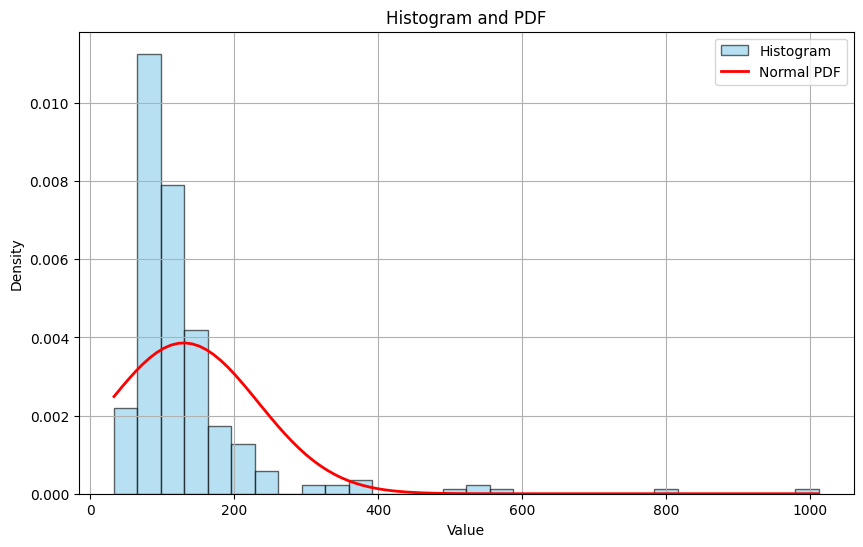

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example: simulate a normal distribution
data = vienna_cut['price']

# Create x values from min to max
x = np.linspace(min(data), max(data), 100)

# Compute the normal PDF with mean and std of your data
mean, std = np.mean(data), np.std(data)
pdf = norm.pdf(x, mean, std)

# Plot histogram and PDF
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Normal PDF')
plt.title('Histogram and PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
